# Problem 6.1

**Integrated Energy Grids**


**Problem 6.1**


**Consider the simplified network plotted in Fig. 1, which represents Denmark and its neighbouring countries. Assume that the nodes are connected using transmission methane gas pipelines.**

**(a) Calculate the capacity of every pipeline (in MW) assuming that they operate at a pressure $P$=50 bar, the average gas flow velocity is $u$ = 15 m/s, the diameter of the pipes is $D$ = 600mm and the energy content of methane is 50 GJ/tonne. To calculate the speed of sound in gas $c$, assume the universal gas constant $R$=8.314 J/molK, the molar mass of methane $M$=16 g/mol, compression factor $Z$=1.31, and temperature $T$=25$^{\circ}$C.**

:::{note}
If you have not yet set up Python on your computer, you can execute this tutorial in your browser via [Google Colab](https://colab.research.google.com/). Click on the rocket in the top right corner and launch "Colab". If that doesn't work download the `.ipynb` file and import it in [Google Colab](https://colab.research.google.com/).

Then install the following packages by executing the following command in a Jupyter cell at the top of the notebook.

```sh
!pip install numpy pypsa
```
:::

In [1]:
import numpy as np
import pypsa

Set parameter Username
Set parameter LicenseID to value 2767832
Academic license - for non-commercial use only - expires 2027-01-20


The cross-sectional area $A$ and the speed of sound in gas $c$ can be calculated as

In [2]:
D = 0.6 # m
u = 15 # m/s
P = 50*100000 #Pa
Z = 1.31
R = 8.314 # J/molK
M = 0.016 # Kg/mol
T = 273+25 # K
e = 50 # GJ/tonne or MJ/kg

A = np.pi*(D/2)**2
c=np.sqrt(Z*R*T/M)
c

np.float64(450.3900615022494)

The density can be calculated as

In [3]:
rho = P / c**2
rho

np.float64(24.648608512719843)

The capacity of every pipeline can be calculated as $Q = \rho A u e$

In [4]:
capacity = rho*A*u*e
capacity

np.float64(5226.922401172076)

So, we obtain that the capacity is aproximately 5.2 GW

**(b) Assuming steady-state conditions, use link elements in PyPSA to build a network like the one shown in Fig. 1.  Assume that, in the first time step,  in every node, there is a demand for 5 GWh of methane.  In the Norway node there is a gas generator with a marginal cost of 20 EUR/MWh$_{th}$. Calculate the optimal gas flows through the network and plot them.**

We start by creating the network object and adding the buses or nodes

In [5]:
network = pypsa.Network()
nodes = ["DE", "DK1", "DK2", "NO", "SE"]
pos = [[0, 0],[0, 1],[1, 1],[0, 2],[1, 2]] # We add the nodes' position only to make the plot later look pretty

for i,node in enumerate(nodes):
    network.add("Bus", 
                "bus {}".format(node),
               x=pos[i][0],
               y=pos[i][1]) 
network.buses

,v_nom,type,x,y,carrier,unit,location,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,generator,sub_network
name,,,,,,,,,,,,,
bus DE,1.0,,0.0,0.0,AC,,,1.0,0.0,inf,PQ,,
bus DK1,1.0,,0.0,1.0,AC,,,1.0,0.0,inf,PQ,,
bus DK2,1.0,,1.0,1.0,AC,,,1.0,0.0,inf,PQ,,
bus NO,1.0,,0.0,2.0,AC,,,1.0,0.0,inf,PQ,,
bus SE,1.0,,1.0,2.0,AC,,,1.0,0.0,inf,PQ,,


We add the links representing the gas pipelines

In [6]:
network.add("Link","pipeline DE-DK1", bus0 = "bus DE", bus1 = "bus DK1", p_nom = capacity, p_min_pu=-1) #p_min_pu makes the pipeline reversible
network.add("Link","pipeline DK1-DK2", bus0 = "bus DK1", bus1 = "bus DK2", p_nom = capacity, p_min_pu=-1)
network.add("Link","pipeline DK1-NO", bus0 = "bus DK1", bus1 = "bus NO", p_nom = capacity, p_min_pu=-1)
network.add("Link","pipeline DK1-SE", bus0 = "bus DK1", bus1 = "bus SE", p_nom = capacity, p_min_pu=-1)
network.add("Link","pipeline DK2-SE", bus0 = "bus DK2", bus1 = "bus SE", p_nom = capacity, p_min_pu=-1)
network.links

,bus0,bus1,type,carrier,efficiency,active,build_year,lifetime,p_nom,p_nom_mod,...,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
name,,,,,,,,,,,,,,,,,,,,,
pipeline DE-DK1,bus DE,bus DK1,,,1.0,True,0,inf,5226.922401,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
pipeline DK1-DK2,bus DK1,bus DK2,,,1.0,True,0,inf,5226.922401,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
pipeline DK1-NO,bus DK1,bus NO,,,1.0,True,0,inf,5226.922401,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
pipeline DK1-SE,bus DK1,bus SE,,,1.0,True,0,inf,5226.922401,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
pipeline DK2-SE,bus DK2,bus SE,,,1.0,True,0,inf,5226.922401,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0


In [7]:
nodes

['DE', 'DK1', 'DK2', 'NO', 'SE']

We add the loads and generator

In [8]:
for node in nodes:
    network.add("Load", 
                "gas demand {}".format(node), 
                 bus="bus {}".format(node), 
                 p_set=1000) #demand 1GWh = 1,000 MWh
network.loads

,bus,carrier,type,p_set,q_set,sign,active
name,,,,,,,
gas demand DE,bus DE,,,1000.0,0.0,-1.0,True
gas demand DK1,bus DK1,,,1000.0,0.0,-1.0,True
gas demand DK2,bus DK2,,,1000.0,0.0,-1.0,True
gas demand NO,bus NO,,,1000.0,0.0,-1.0,True
gas demand SE,bus SE,,,1000.0,0.0,-1.0,True


In [9]:
network.add("Generator", 
            "gas", 
            bus="bus NO", 
            p_nom=10000,  #not relevant, just set it so that it is not limiting
            marginal_cost=20) #EUR/MWh_th
network.generators

,bus,control,type,p_nom,p_nom_mod,p_nom_extendable,p_nom_min,p_nom_max,p_nom_set,p_min_pu,...,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,weight,p_nom_opt
name,,,,,,,,,,,,,,,,,,,,,
gas,bus NO,PQ,,10000.0,0.0,False,0.0,inf,NaN,0.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0


In [10]:
network.optimize()

Index(['bus DE', 'bus DK1', 'bus DK2', 'bus NO', 'bus SE'], dtype='object', name='name')
Index(['pipeline DE-DK1', 'pipeline DK1-DK2', 'pipeline DK1-NO',
       'pipeline DK1-SE', 'pipeline DK2-SE'],
      dtype='object', name='name')
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.io: Writing time: 0.22s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 6 primals, 17 duals
Objective: 1.00e+05
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were not assigned to the network.


Running HiGHS 1.12.0 (git hash: n/a): Copyright (c) 2025 HiGHS under MIT licence terms
LP linopy-problem-zn7q1u47 has 17 rows; 6 cols; 23 nonzeros
Coefficient ranges:
  Matrix  [1e+00, 1e+00]
  Cost    [2e+01, 2e+01]
  Bound   [0e+00, 0e+00]
  RHS     [1e+03, 1e+04]
Presolving model
0 rows, 0 cols, 0 nonzeros  0s
0 rows, 0 cols, 0 nonzeros  0s
Presolve reductions: rows 0(-17); columns 0(-6); nonzeros 0(-23) - Reduced to empty
Performed postsolve
Solving the original LP from the solution after postsolve

Model name          : linopy-problem-zn7q1u47
Model status        : Optimal
Objective value     :  1.0000000000e+05
P-D objective error :  0.0000000000e+00
HiGHS run time      :          0.00


('ok', 'optimal')

In [11]:
network.generators_t.p

name,gas
snapshot,
now,5000.0


In [12]:
gas_flows=network.links_t.p0.loc['now']/1000 #MWh->GWh
gas_flows 

name
pipeline DE-DK1    -1.000000
pipeline DK1-DK2   -3.226922
pipeline DK1-NO    -4.000000
pipeline DK1-SE     5.226922
pipeline DK2-SE    -4.226922
Name: now, dtype: float64

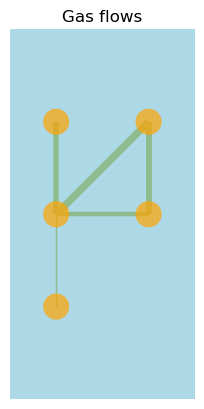

In [18]:
network.plot(
    margin=0.5,
    bus_colors="orange",
    bus_alpha=0.7,
    geomap_color=True,
    link_widths=abs(gas_flows),
    title="Gas flows",
);

**(c) Assume the following lengths for the links: DK1-DK2=200 km, DK1-DE=600 km, DK1-NO= 500 km, DK1-SE=600 km, DK2-SE=100 km. If we consider that the losses due to energy consumption of the compressors' to maintain the pressure can be estimated at 2\% of the energy flow per 1000 km. Adapt the link elements in PyPSA to include an efficiency that takes compressors' energy demand into account. calculate the optimal gas flows through the network and plot them.**


In [19]:
losses_per_1000km = 0.02 #%

Since we want to represent losses by imposing a certain efficiency in the links, we can not anymore define them as reversible by making `p_min_pu=-1` and we need to duplicate and reverse the links. 

In [20]:
network.add("Link","pipeline DE-DK1", bus0 = "bus DE", bus1 = "bus DK1", efficiency = 1-600/1000*losses_per_1000km, overwrite=True, p_nom = capacity) 
network.add("Link","pipeline DK1-DK2", bus0 = "bus DK1", bus1 = "bus DK2", efficiency = 1-200/1000*losses_per_1000km, overwrite=True, p_nom = capacity)
network.add("Link","pipeline DK1-NO", bus0 = "bus DK1", bus1 = "bus NO", efficiency = 1-500/1000*losses_per_1000km, overwrite=True, p_nom = capacity)
network.add("Link","pipeline DK1-SE", bus0 = "bus DK1", bus1 = "bus SE", efficiency = 1-600/1000*losses_per_1000km, overwrite=True, p_nom = capacity)
network.add("Link","pipeline DK2-SE", bus0 = "bus DK2", bus1 = "bus SE", efficiency = 1-100/1000*losses_per_1000km, overwrite=True, p_nom = capacity)

network.add("Link","pipeline DK1-DE", bus1 = "bus DE", bus0 = "bus DK1", efficiency = 1-600/1000*losses_per_1000km, overwrite=True, p_nom = capacity) 
network.add("Link","pipeline DK2-DK1", bus1 = "bus DK1", bus0 = "bus DK2", efficiency = 1-200/1000*losses_per_1000km, overwrite=True, p_nom = capacity)
network.add("Link","pipeline NO-DK1", bus1 = "bus DK1", bus0 = "bus NO", efficiency = 1-500/1000*losses_per_1000km, overwrite=True, p_nom = capacity)
network.add("Link","pipeline SE-DK1", bus1 = "bus DK1", bus0 = "bus SE", efficiency = 1-600/1000*losses_per_1000km, overwrite=True, p_nom = capacity)
network.add("Link","pipeline SE-DK2", bus1 = "bus DK2", bus0 = "bus SE", efficiency = 1-100/1000*losses_per_1000km, overwrite=True, p_nom = capacity)

network.links

,bus0,bus1,type,carrier,efficiency,active,build_year,lifetime,p_nom,p_nom_mod,...,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
name,,,,,,,,,,,,,,,,,,,,,
pipeline DE-DK1,bus DE,bus DK1,,,0.988,True,0,inf,5226.922401,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
pipeline DK1-DK2,bus DK1,bus DK2,,,0.996,True,0,inf,5226.922401,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
pipeline DK1-NO,bus DK1,bus NO,,,0.990,True,0,inf,5226.922401,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
pipeline DK1-SE,bus DK1,bus SE,,,0.988,True,0,inf,5226.922401,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
pipeline DK2-SE,bus DK2,bus SE,,,0.998,True,0,inf,5226.922401,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
pipeline DK1-DE,bus DK1,bus DE,,,0.988,True,0,inf,5226.922401,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
pipeline DK2-DK1,bus DK2,bus DK1,,,0.996,True,0,inf,5226.922401,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
pipeline NO-DK1,bus NO,bus DK1,,,0.990,True,0,inf,5226.922401,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
pipeline SE-DK1,bus SE,bus DK1,,,0.988,True,0,inf,5226.922401,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0


In [21]:
network.optimize()

Index(['bus DE', 'bus DK1', 'bus DK2', 'bus NO', 'bus SE'], dtype='object', name='name')


Index(['pipeline DE-DK1', 'pipeline DK1-DK2', 'pipeline DK1-NO',
       'pipeline DK1-SE', 'pipeline DK2-SE', 'pipeline DK1-DE',
       'pipeline DK2-DK1', 'pipeline NO-DK1', 'pipeline SE-DK1',
       'pipeline SE-DK2'],
      dtype='object', name='name')
Index(['0', '1', '2', '3', '4'], dtype='object', name='name')
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.io: Writing time: 0.08s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11 primals, 27 duals
Objective: 1.01e+05
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were not assigned to the network.


Running HiGHS 1.12.0 (git hash: n/a): Copyright (c) 2025 HiGHS under MIT licence terms
LP linopy-problem-vl77htxf has 27 rows; 11 cols; 43 nonzeros
Coefficient ranges:
  Matrix  [1e+00, 1e+00]
  Cost    [2e+01, 2e+01]
  Bound   [0e+00, 0e+00]
  RHS     [1e+03, 1e+04]
Presolving model
4 rows, 10 cols, 18 nonzeros  0s
Dependent equations search running on 4 equations with time limit of 1000.00s
Dependent equations search removed 0 rows and 0 nonzeros in 0.00s (limit = 1000.00s)
4 rows, 10 cols, 18 nonzeros  0s
Presolve reductions: rows 4(-23); columns 10(-1); nonzeros 18(-25) 
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     5.0487388926e-04 Pr: 4(5012.15) 0s
          6     1.0125636230e+05 Pr: 0(0) 0s

Performed postsolve
Solving the original LP from the solution after postsolve

Model name          : linopy-problem-vl77htxf
Model status        : Optimal
Simplex   iterations: 6
Objective value     

('ok', 'optimal')

In [22]:
network.generators_t.p

name,gas
snapshot,
now,5062.818115


In [23]:
gas_flows=network.links_t.p0.loc['now']/1000 #MWh->GWh
gas_flows 

name
pipeline DE-DK1    -0.000000
pipeline DK1-DK2    2.010044
pipeline DK1-NO    -0.000000
pipeline DK1-SE    -0.000000
pipeline DK2-SE     1.002004
pipeline DK1-DE     1.012146
pipeline DK2-DK1   -0.000000
pipeline NO-DK1     4.062818
pipeline SE-DK1    -0.000000
pipeline SE-DK2    -0.000000
Name: now, dtype: float64

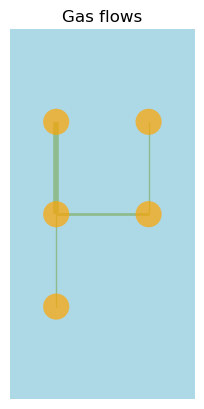

In [25]:
network.plot(
    margin=0.5,
    bus_colors="orange",
    bus_alpha=0.7,
    geomap_color=True,
    link_widths=gas_flows,
    title="Gas flows",
);

**(d) Assuming the following demands in GWh for three consecutive time steps DE=[0,0,3], DK1=[1,2,1], DK2=[1,1,1], NO=[1,1,1], SE=[0,1,0]. Calculate the optimal flows in every time step and the total system costs.**

We create the network again but this time with 3 time steps. 

In [26]:
network=pypsa.Network(snapshots=range(3))

for i,node in enumerate(nodes):
    network.add("Bus", 
                "bus {}".format(node),
               x=pos[i][0],
               y=pos[i][1]) 

network.add("Generator", 
            "gas", 
            bus="bus NO", 
            p_nom=100000,  #not relevant, just set so that it is not limiting
            marginal_cost=20) #EUR/MWh_th


network.add("Link","pipeline DE-DK1", bus0 = "bus DE", bus1 = "bus DK1", efficiency = 1-600/1000*losses_per_1000km, overwrite=True, p_nom = capacity) 
network.add("Link","pipeline DK1-DK2", bus0 = "bus DK1", bus1 = "bus DK2", efficiency = 1-200/1000*losses_per_1000km, overwrite=True, p_nom = capacity)
network.add("Link","pipeline DK1-NO", bus0 = "bus DK1", bus1 = "bus NO", efficiency = 1-500/1000*losses_per_1000km, overwrite=True, p_nom = capacity)
network.add("Link","pipeline DK1-SE", bus0 = "bus DK1", bus1 = "bus SE", efficiency = 1-600/1000*losses_per_1000km, overwrite=True, p_nom = capacity)
network.add("Link","pipeline DK2-SE", bus0 = "bus DK2", bus1 = "bus SE", efficiency = 1-100/1000*losses_per_1000km, overwrite=True, p_nom = capacity)

network.add("Link","pipeline DK1-DE", bus1 = "bus DE", bus0 = "bus DK1", efficiency = 1-600/1000*losses_per_1000km, overwrite=True, p_nom = capacity) 
network.add("Link","pipeline DK2-DK1", bus1 = "bus DK1", bus0 = "bus DK2", efficiency = 1-200/1000*losses_per_1000km, overwrite=True, p_nom = capacity)
network.add("Link","pipeline NO-DK1", bus1 = "bus DK1", bus0 = "bus NO", efficiency = 1-500/1000*losses_per_1000km, overwrite=True, p_nom = capacity)
network.add("Link","pipeline SE-DK1", bus1 = "bus DK1", bus0 = "bus SE", efficiency = 1-600/1000*losses_per_1000km, overwrite=True, p_nom = capacity)
network.add("Link","pipeline SE-DK2", bus1 = "bus DK2", bus0 = "bus SE", efficiency = 1-100/1000*losses_per_1000km, overwrite=True, p_nom = capacity)
network.links

,bus0,bus1,type,carrier,efficiency,active,build_year,lifetime,p_nom,p_nom_mod,...,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
name,,,,,,,,,,,,,,,,,,,,,
pipeline DE-DK1,bus DE,bus DK1,,,0.988,True,0,inf,5226.922401,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
pipeline DK1-DK2,bus DK1,bus DK2,,,0.996,True,0,inf,5226.922401,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
pipeline DK1-NO,bus DK1,bus NO,,,0.990,True,0,inf,5226.922401,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
pipeline DK1-SE,bus DK1,bus SE,,,0.988,True,0,inf,5226.922401,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
pipeline DK2-SE,bus DK2,bus SE,,,0.998,True,0,inf,5226.922401,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
pipeline DK1-DE,bus DK1,bus DE,,,0.988,True,0,inf,5226.922401,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
pipeline DK2-DK1,bus DK2,bus DK1,,,0.996,True,0,inf,5226.922401,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
pipeline NO-DK1,bus NO,bus DK1,,,0.990,True,0,inf,5226.922401,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
pipeline SE-DK1,bus SE,bus DK1,,,0.988,True,0,inf,5226.922401,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0


We add the load in every node. 

In [27]:
loads=[[0,0,3000],
       [1000,2000,1000],
       [1000,1000,1000],       
       [1000,1000,1000],
       [0,1000,0]]

for i, node in enumerate(nodes):
    network.add("Load", 
                "gas demand {}".format(node), 
                 bus="bus {}".format(node), 
                 p_set=loads[i],
                 overwrite=True)
network.loads_t

{'p_set': name      gas demand DE  gas demand DK1  gas demand DK2  gas demand NO  \
 snapshot                                                                 
 0                   0.0          1000.0          1000.0         1000.0   
 1                   0.0          2000.0          1000.0         1000.0   
 2                3000.0          1000.0          1000.0         1000.0   
 
 name      gas demand SE  
 snapshot                 
 0                   0.0  
 1                1000.0  
 2                   0.0  ,
 'q_set': Empty DataFrame
 Columns: []
 Index: [0, 1, 2],
 'p': Empty DataFrame
 Columns: []
 Index: [0, 1, 2],
 'q': Empty DataFrame
 Columns: []
 Index: [0, 1, 2]}

In [28]:
network.optimize()

Index(['bus DE', 'bus DK1', 'bus DK2', 'bus NO', 'bus SE'], dtype='object', name='name')


Index(['pipeline DE-DK1', 'pipeline DK1-DK2', 'pipeline DK1-NO',
       'pipeline DK1-SE', 'pipeline DK2-SE', 'pipeline DK1-DE',
       'pipeline DK2-DK1', 'pipeline NO-DK1', 'pipeline SE-DK1',
       'pipeline SE-DK2'],
      dtype='object', name='name')
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.io: Writing time: 0.04s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 33 primals, 81 duals
Objective: 2.83e+05
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were not assigned to the network.


Running HiGHS 1.12.0 (git hash: n/a): Copyright (c) 2025 HiGHS under MIT licence terms
LP linopy-problem-fyq_jdbg has 81 rows; 33 cols; 129 nonzeros
Coefficient ranges:
  Matrix  [1e+00, 1e+00]
  Cost    [2e+01, 2e+01]
  Bound   [0e+00, 0e+00]
  RHS     [1e+03, 1e+05]
Presolving model
12 rows, 30 cols, 54 nonzeros  0s
Dependent equations search running on 12 equations with time limit of 1000.00s
Dependent equations search removed 0 rows and 0 nonzeros in 0.00s (limit = 1000.00s)
12 rows, 30 cols, 54 nonzeros  0s
Presolve reductions: rows 12(-69); columns 30(-3); nonzeros 54(-75) 
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     1.1758012135e-03 Pr: 10(14036.4) 0s
         18     2.8332350627e+05 Pr: 0(0) 0s

Performed postsolve
Solving the original LP from the solution after postsolve

Model name          : linopy-problem-fyq_jdbg
Model status        : Optimal
Simplex   iterations: 18
Objective val

('ok', 'optimal')

We can see the gas flows in every pipeline using

In [29]:
network.links_t.p0

name,pipeline DE-DK1,pipeline DK1-DK2,pipeline DK1-NO,pipeline DK1-SE,pipeline DK2-SE,pipeline DK1-DE,pipeline DK2-DK1,pipeline NO-DK1,pipeline SE-DK1,pipeline SE-DK2
snapshot,,,,,,,,,,
0,-0.0,1004.016064,-0.0,-0.0,-0.000000,-0.000000,-0.0,2024.258651,-0.0,-0.0
1,-0.0,2010.044185,-0.0,-0.0,1002.004008,-0.000000,-0.0,4050.549682,-0.0,-0.0
2,-0.0,1004.016064,-0.0,-0.0,-0.000000,3036.437247,-0.0,5091.366981,-0.0,-0.0


And the total system cost is

In [30]:
network.objective

283323.50626732665

***(e) Modify the demand for the German node to be DE=[0,0,6] GWh and keep the other node as in the previous section. Calculate the optimal flows in every time step and the total system costs.***

In [31]:
network.add("Load", 
            "gas demand DE", 
            bus="bus DE", 
            p_set=[0,0,6000],
            overwrite=True)
network.optimize()

Index(['bus DE', 'bus DK1', 'bus DK2', 'bus NO', 'bus SE'], dtype='object', name='name')


Index(['pipeline DE-DK1', 'pipeline DK1-DK2', 'pipeline DK1-NO',
       'pipeline DK1-SE', 'pipeline DK2-SE', 'pipeline DK1-DE',
       'pipeline DK2-DK1', 'pipeline NO-DK1', 'pipeline SE-DK1',
       'pipeline SE-DK2'],
      dtype='object', name='name')
Index(['0', '1', '2', '3', '4'], dtype='object', name='name')
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.io: Writing time: 0.03s
Status: warning
Termination condition: infeasible
Solution: 0 primals, 0 duals
Objective: nan
Solver model: available
Solver message: Infeasible



Running HiGHS 1.12.0 (git hash: n/a): Copyright (c) 2025 HiGHS under MIT licence terms
LP linopy-problem-9n2b0t9f has 81 rows; 33 cols; 129 nonzeros
Coefficient ranges:
  Matrix  [1e+00, 1e+00]
  Cost    [2e+01, 2e+01]
  Bound   [0e+00, 0e+00]
  RHS     [1e+03, 1e+05]
Presolving model
Problem status detected on presolve: Infeasible
Model name          : linopy-problem-9n2b0t9f
Model status        : Infeasible
Objective value     :  0.0000000000e+00
HiGHS run time      :          0.00


('warning', 'infeasible')

The model is unfeasible because the capacity of the link connecting DK1 and DE is not enought to transport 6 GWh in the last time step.

**(f) Assume that the pipeline pressure can be increased from 50 to 55 bar, calculate the linepack, i.e., the energy that can be stored in every pipeline by increasing the pressure. Represent this in your pypsa model by adding a store with that capacity at the beginning of every line, calculate the optimal gas flows in every time step and the total system costs.**


The energy that can be stored by changing the pressure of the pipeline can be calculated as $Linepack=\frac{\Delta P}{c^2} A·L·e$ (for this example we assume length $L$=1000 km), where we use the energy content (in GJ/tonnes) and convert it to MWh/kg to calculate the linepack in MWh

In [32]:
L = 1000 # km
Delta_P = (55-50)*100000 # Pa

Linepack = (Delta_P/c**2)*A*L*1000*e*0.000277
Linepack

np.float64(9652.383367497767)

In [33]:
network.add("Store", "linepack DE-DK1", bus="bus DE", e_nom=Linepack*600/1000, overwrite=True)
network.add("Store", "linepack DK1-DK2", bus="bus DK1", e_nom=Linepack*200/1000, overwrite=True)
network.add("Store", "linepack DK1-NO", bus="bus DK1", e_nom=Linepack*500/1000, overwrite=True)
network.add("Store", "linepack DK1-SE", bus="bus DK1", e_nom=Linepack*600/1000, overwrite=True)
network.add("Store", "linepack DK2-SE", bus="bus DK2", e_nom=Linepack*100/1000, overwrite=True)
network.stores


,bus,type,carrier,e_nom,e_nom_mod,e_nom_extendable,e_nom_min,e_nom_max,e_nom_set,e_min_pu,...,sign,marginal_cost,marginal_cost_quadratic,marginal_cost_storage,capital_cost,standing_loss,active,build_year,lifetime,e_nom_opt
name,,,,,,,,,,,,,,,,,,,,,
linepack DE-DK1,bus DE,,,5791.430020,0.0,False,0.0,inf,NaN,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,True,0,inf,0.0
linepack DK1-DK2,bus DK1,,,1930.476673,0.0,False,0.0,inf,NaN,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,True,0,inf,0.0
linepack DK1-NO,bus DK1,,,4826.191684,0.0,False,0.0,inf,NaN,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,True,0,inf,0.0
linepack DK1-SE,bus DK1,,,5791.430020,0.0,False,0.0,inf,NaN,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,True,0,inf,0.0
linepack DK2-SE,bus DK2,,,965.238337,0.0,False,0.0,inf,NaN,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,True,0,inf,0.0


In [34]:
network.optimize()

Index(['bus DE', 'bus DK1', 'bus DK2', 'bus NO', 'bus SE'], dtype='object', name='name')
Index(['pipeline DE-DK1', 'pipeline DK1-DK2', 'pipeline DK1-NO',
       'pipeline DK1-SE', 'pipeline DK2-SE', 'pipeline DK1-DE',
       'pipeline DK2-DK1', 'pipeline NO-DK1', 'pipeline SE-DK1',
       'pipeline SE-DK2'],
      dtype='object', name='name')


Index(['linepack DE-DK1', 'linepack DK1-DK2', 'linepack DK1-NO',
       'linepack DK1-SE', 'linepack DK2-SE'],
      dtype='object', name='name')
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.io: Writing time: 0.06s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 63 primals, 126 duals
Objective: 3.45e+05
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance were not assigned to the network.


Running HiGHS 1.12.0 (git hash: n/a): Copyright (c) 2025 HiGHS under MIT licence terms
LP linopy-problem-y8uqkzt_ has 126 rows; 63 cols; 214 nonzeros
Coefficient ranges:
  Matrix  [1e+00, 1e+00]
  Cost    [2e+01, 2e+01]
  Bound   [0e+00, 0e+00]
  RHS     [1e+03, 1e+05]
Presolving model
25 rows, 58 cols, 108 nonzeros  0s
15 rows, 48 cols, 88 nonzeros  0s
Dependent equations search running on 15 equations with time limit of 1000.00s
Dependent equations search removed 0 rows and 0 nonzeros in 0.00s (limit = 1000.00s)
15 rows, 42 cols, 78 nonzeros  0s
Presolve reductions: rows 15(-111); columns 42(-21); nonzeros 78(-136) 
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     0.0000000000e+00 Pr: 11(17000) 0s
         24     3.4466567287e+05 Pr: 0(0) 0s

Performed postsolve
Solving the original LP from the solution after postsolve

Model name          : linopy-problem-y8uqkzt_
Model status        : Optimal
S

('ok', 'optimal')

In [35]:
network.objective

344665.6728726512

In [36]:
network.links_t

{'efficiency': Empty DataFrame
 Columns: []
 Index: [0, 1, 2],
 'p_set': Empty DataFrame
 Columns: []
 Index: [0, 1, 2],
 'p_min_pu': Empty DataFrame
 Columns: []
 Index: [0, 1, 2],
 'p_max_pu': Empty DataFrame
 Columns: []
 Index: [0, 1, 2],
 'marginal_cost': Empty DataFrame
 Columns: []
 Index: [0, 1, 2],
 'marginal_cost_quadratic': Empty DataFrame
 Columns: []
 Index: [0, 1, 2],
 'stand_by_cost': Empty DataFrame
 Columns: []
 Index: [0, 1, 2],
 'ramp_limit_up': Empty DataFrame
 Columns: []
 Index: [0, 1, 2],
 'ramp_limit_down': Empty DataFrame
 Columns: []
 Index: [0, 1, 2],
 'p0': name      pipeline DE-DK1  pipeline DK1-DK2  pipeline DK1-NO  pipeline DK1-SE  \
 snapshot                                                                        
 0                    -0.0       1004.016064             -0.0             -0.0   
 1                    -0.0       2010.044185             -0.0             -0.0   
 2                    -0.0       1004.016064             -0.0             -0.0   

The model is now feasible because part of the energy to be transmited in the link DE-DK1 can be stored as linepack